### Imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Configurações

In [7]:
pd.set_option('display.max_columns', 500)

# Predição de bons pagadores (Crédito)

##### **Contexto**:
Uma empresa de cartões de crédito disponibilizou uma base de dados, contendo informações demográficas e financiais, de seus clientes. Cada linha representa uma conta bancária.

##### **Objetivo**:
Criar um modelo capaz de captar a inadimplência dos clientes no próximo mês.

### Iniciando o projeto

#### Exploração dos dados

In [3]:
df = pd.read_excel('data/default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [4]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


##### 1. How many columns are there in the data?
##### 2. How many rows (samples)?

In [8]:
colunas = ''

for coluna in df.columns:
    colunas += coluna + ', '
    
print(f'Esse conjunto de dados possui {df.shape[0]} observações e {df.shape[1]} variáveis. Sendo elas:\n\n{colunas}')

Esse conjunto de dados possui 30000 observações e 25 variáveis. Sendo elas:

ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default payment next month, 


##### 3. What kind of features are there? Which are categorical and which are numerical?

In [93]:
colunas_numericas = [column for column in df.columns if df[column].dtype == 'int64']
colunas_categoricas = [column for column in df.columns if df[column].dtype == 'object']

print(f'Das colunas presentes, {len(colunas_numericas)} são numéricas e {len(colunas_categoricas)} são categóricas')

Das colunas presentes, 23 são numéricas e 2 são categóricas


##### 4. What does the data look like in these features?

##### Podemos encontrar um pequeno problema. A coluna "**PAY_1**" está sendo classificada como categórica, porém, seus dados são numéricos.

In [78]:
df[colunas_categoricas].head()

,ID,PAY_1
0,798fc410-45c1,2
1,8a8c8f3b-8eb4,-1
2,85698822-43f5,0
3,0737c11b-be42,0
4,3b7f77cc-dbc0,-1


##### Dicionário criado para facilitar a identificação das variáveis durante o projeto.

In [24]:
info_var = {
    "LIMIT_BAL": "Amount of the credit provided (in New Taiwanese (NT) dollar) including individual consumer credit and the family (supplementary) credit.",
    "SEX": "Gender (1 = male; 2 = female).",
    "EDUCATION": "Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).",
    "MARRIAGE": "Marital status (1 = married; 2 = single; 3 = others).",
    "AGE": "Age (year).",
    "PAY_1": "A record of past payments. Represents the repayment status in September. (-1 = pay duly; 1 = payment delay for one month and so on..)",
    "PAY_2": "A record of past payments. Represents the repayment status in August. (-1 = pay duly; 1 = payment delay for one month and so on..)",
    "PAY_3": "A record of past payments. Represents the repayment status in July. (-1 = pay duly; 1 = payment delay for one month and so on..)",
    "PAY_4": "A record of past payments. Represents the repayment status in June. (-1 = pay duly; 1 = payment delay for one month and so on..)",
    "PAY_5": "A record of past payments. Represents the repayment status in May. (-1 = pay duly; 1 = payment delay for one month and so on..)",
    "PAY_6": "A record of past payments. Represents the repayment status in April. (-1 = pay duly; 1 = payment delay for one month and so on..)",
    "BILL_AMT1": "Represents the bill statement (in NT dollar) amount in September",
    "BILL_AMT2": "Represents the bill statement (in NT dollar) amount in August",
    "BILL_AMT3": "Represents the bill statement (in NT dollar) amount in July",
    "BILL_AMT4": "Represents the bill statement (in NT dollar) amount in June",
    "BILL_AMT5": "Represents the bill statement (in NT dollar) amount in May",
    "BILL_AMT6": "Represents the bill statement (in NT dollar) amount in April",
    "PAY_AMT1" : "Amount of previous payment (NT dollar). Represents the amount paid in September",
    "PAY_AMT2" : "Amount of previous payment (NT dollar). Represents the amount paid in August",
    "PAY_AMT3" : "Amount of previous payment (NT dollar). Represents the amount paid in July",
    "PAY_AMT4" : "Amount of previous payment (NT dollar). Represents the amount paid in June",
    "PAY_AMT5" : "Amount of previous payment (NT dollar). Represents the amount paid in May",
    "PAY_AMT6" : "Amount of previous payment (NT dollar). Represents the amount paid in April"
}

##### Validando se os números de ID's não estão repetidos.

In [26]:
df["ID"].nunique()

29687

In [40]:
df["ID"].value_counts().value_counts()

count
1    29374
2      313
Name: count, dtype: int64

###### Existem 313 casos de ID's repetidos.

In [ ]:
duplicados = df[df.duplicated('ID', keep=False)].sort_values(by='ID', ascending=False)

duplicados.head(6)

In [52]:
dupe_ids = list(duplicados["ID"].unique())

### Remoção dos ID's repetidos*

*_OBS:_* _Ao remover dados antes do treinamento, pode acarretar em vazamento de dados (data leakage). Essa abordagem foi utilizada pelo autor, e seguiremos dessa forma durante este projeto._

In [88]:
df_zero_mask = df == 0
feature_zero_mask = df_zero_mask.iloc[:, 1:].all(axis=1)

In [92]:
df_clean = df.loc[~feature_zero_mask].copy()

In [93]:
df_clean

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


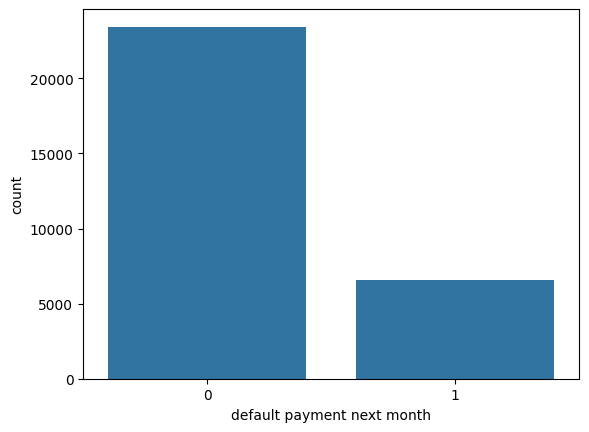

In [16]:
sns.countplot(data=df, x=df['default payment next month'])
plt.show()